In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train = train[train.Utilities != 'NoSeWa']

train=train.drop(columns=['Id','Utilities', 'Street'])
test=test.drop(columns=['Id','Utilities', 'Street'])
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


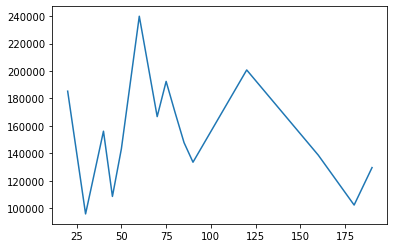

In [5]:
#no null values in MSSubClass
plt.plot(train[['MSSubClass', 'SalePrice']].groupby(['MSSubClass'], as_index=True).mean())

In [6]:
#null values in MSZoning test set. Drop C
train.loc[(train['MSZoning'] == 'C (all)') , 'MSZoning'] = np.nan
test.loc[(test['MSZoning'] == 'C (all)') , 'MSZoning'] = np.nan
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
test['MSZoning'] = test['MSZoning'].fillna(train['MSZoning'].mode()[0])

#combine RH and RM into 1 category
train.loc[(train['MSZoning'] == 'RH') | (train['MSZoning'] == 'RM') , 'MSZoning'] = 'RHM'
test.loc[(test['MSZoning'] == 'RH') | (test['MSZoning'] == 'RM') , 'MSZoning'] = 'RHM'

#encode
train = pd.concat([train, pd.get_dummies(train['MSZoning'], drop_first=True, prefix='MSZoning')], axis = 1)
train=train.drop(columns=['MSZoning'])
test = pd.concat([test, pd.get_dummies(test['MSZoning'], drop_first=True, prefix='MSZoning')], axis = 1)
test=test.drop(columns=['MSZoning'])

In [7]:
#Lot Frontage
#null values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
train['LotFrontage'] = imputer.fit_transform(train['LotFrontage'].values.reshape(-1, 1))
test['LotFrontage'] = imputer.transform(test['LotFrontage'].values.reshape(-1, 1))

# bands
# train['LotFrontage'] = pd.cut(train['LotFrontage'], 3)
train.loc[ train['LotFrontage'] <= 60, 'LotFrontage'] = 0
train.loc[(train['LotFrontage'] > 60) & (train['LotFrontage'] <= 100), 'LotFrontage'] = 1
train.loc[(train['LotFrontage'] > 100) & (train['LotFrontage'] <= 120), 'LotFrontage'] = 2
train.loc[(train['LotFrontage'] > 120), 'LotFrontage'] = 3

test.loc[ test['LotFrontage'] <= 60, 'LotFrontage'] = 0
test.loc[(test['LotFrontage'] > 60) & (test['LotFrontage'] <= 100), 'LotFrontage'] = 1
test.loc[(test['LotFrontage'] > 100) & (test['LotFrontage'] <= 120), 'LotFrontage'] = 2
test.loc[(test['LotFrontage'] > 120), 'LotFrontage'] = 3


In [8]:
#LotArea. non null
#scaled
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train['LotArea'] = sc.fit_transform(train['LotArea'].values.reshape(-1, 1))
test['LotArea'] = sc.transform(test['LotArea'].values.reshape(-1, 1))

In [9]:
#Alley
train.loc[(train['Alley'] == 'Pave') | (train['Alley'] == 'Grvl') , 'Alley'] = 'alley'
test.loc[(test['Alley'] == 'Pave') | (test['Alley'] == 'Grvl') , 'Alley'] = 'alley'
train['Alley'].fillna('No', inplace=True)
test['Alley'].fillna('No', inplace=True)

# label encode 1/0
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['Alley'] = le.fit_transform(train['Alley'])
test['Alley'] = le.transform(test['Alley'])

In [10]:
#LotShape non null
train.loc[(train['LotShape'] == 'IR2') | (train['LotShape'] == 'IR3') , 'LotShape'] = 'IR23'
test.loc[(test['LotShape'] == 'IR2') | (test['LotShape'] == 'IR3') , 'LotShape'] = 'IR23'

#encode
train = pd.concat([train, pd.get_dummies(train['LotShape'], drop_first=True, prefix='LotShape')], axis = 1)
train=train.drop(columns=['LotShape'])
test = pd.concat([test, pd.get_dummies(test['LotShape'], drop_first=True, prefix='LotShape')], axis = 1)
test=test.drop(columns=['LotShape'])

In [11]:
#LandContour. non null.
#encode
train = pd.concat([train, pd.get_dummies(train['LandContour'], drop_first=True, prefix='LandContour')], axis = 1)
train=train.drop(columns=['LandContour'])
test = pd.concat([test, pd.get_dummies(test['LandContour'], drop_first=True, prefix='LandContour')], axis = 1)
test=test.drop(columns=['LandContour'])

In [12]:
#LotConfig. combine inside and cfr
train.loc[(train['LotConfig'] == 'FR3') | (train['LotConfig'] == 'FR2') | (train['LotConfig'] == 'Corner'), 'LotConfig'] = 'Inside'
test.loc[(test['LotConfig'] == 'FR3') | (test['LotConfig'] == 'FR2') | (test['LotConfig'] == 'Corner'), 'LotConfig'] = 'Inside'

#encode
train = pd.concat([train, pd.get_dummies(train['LotConfig'], drop_first=True, prefix='LotConfig')], axis = 1)
train=train.drop(columns=['LotConfig'])
test = pd.concat([test, pd.get_dummies(test['LotConfig'], drop_first=True, prefix='LotConfig')], axis = 1)
test=test.drop(columns=['LotConfig'])

In [13]:
#LandSlope non null.
train.loc[(train['LandSlope'] == 'Sev'), 'LandSlope'] = 'Mod'
test.loc[(test['LandSlope'] == 'Sev'), 'LandSlope'] = 'Mod'

#label encode
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['LandSlope'] = le.fit_transform(train['LandSlope'])
test['LandSlope'] = le.transform(test['LandSlope'])

In [14]:
#Neighborhood
train['Neighborhood'].replace(to_replace='Veenker', value=np.nan, inplace=True) 
train['Neighborhood'].replace(to_replace='NPkVill', value=np.nan, inplace=True) 
train['Neighborhood'].replace(to_replace='Blueste', value=np.nan, inplace=True) 
train['Neighborhood'].replace(to_replace='BrDale', value=np.nan, inplace=True) 
train['Neighborhood'].replace(to_replace='Blmngtn', value=np.nan, inplace=True) 

test['Neighborhood'].replace(to_replace='Veenker', value=np.nan, inplace=True) 
test['Neighborhood'].replace(to_replace='NPkVill', value=np.nan, inplace=True) 
test['Neighborhood'].replace(to_replace='Blueste', value=np.nan, inplace=True) 
test['Neighborhood'].replace(to_replace='BrDale', value=np.nan, inplace=True) 
test['Neighborhood'].replace(to_replace='Blmngtn', value=np.nan, inplace=True) 

#encode
train = pd.concat([train, pd.get_dummies(train['Neighborhood'], prefix='Neighborhood')], axis = 1)
train=train.drop(columns=['Neighborhood'])
test = pd.concat([test, pd.get_dummies(test['Neighborhood'],  prefix='Neighborhood')], axis = 1)
test=test.drop(columns=['Neighborhood'])

In [15]:
#Condition1 and 2. 1)Drop cond2. 2)make new col- 1,2//1,1

train.loc[(train['Condition1'] == 'Norm') | (train['Condition2'] == 'Norm') , 'Cond_Norm'] = 1
train.loc[(train['Condition1'] == 'Feedr') | (train['Condition2'] == 'Feedr') , 'Cond_Feedr'] = 1
train.loc[(train['Condition1'] == 'Artery') | (train['Condition2'] == 'Artery') , 'Cond_Artery'] = 1
train.loc[(train['Condition1'] == 'RRAn') | (train['Condition2'] == 'RRAn') , 'Cond_RRAn'] = 1
train.loc[(train['Condition1'] == 'PosN') | (train['Condition2'] == 'PosN') , 'Cond_PosN'] = 1
train.loc[(train['Condition1'] == 'RRAe') | (train['Condition2'] == 'RRAe') , 'Cond_RRAe'] = 1

test.loc[(test['Condition1'] == 'Norm') | (test['Condition2'] == 'Norm') , 'Cond_Norm'] = 1
test.loc[(test['Condition1'] == 'Feedr') | (test['Condition2'] == 'Feedr') , 'Cond_Feedr'] = 1
test.loc[(test['Condition1'] == 'Artery') | (test['Condition2'] == 'Artery') , 'Cond_Artery'] = 1
test.loc[(test['Condition1'] == 'RRAn') | (test['Condition2'] == 'RRAn') , 'Cond_RRAn'] = 1
test.loc[(test['Condition1'] == 'PosN') | (test['Condition2'] == 'PosN') , 'Cond_PosN'] = 1
test.loc[(test['Condition1'] == 'RRAe') | (test['Condition2'] == 'RRAe') , 'Cond_RRAe'] = 1

train=train.drop(columns=['Condition1','Condition2'])
test=test.drop(columns=['Condition1','Condition2'])

train[['Cond_Norm','Cond_Feedr','Cond_Artery','Cond_RRAn','Cond_PosN','Cond_RRAe']] = train[['Cond_Norm','Cond_Feedr','Cond_Artery','Cond_RRAn','Cond_PosN','Cond_RRAe']].fillna(0).astype(int)
test[['Cond_Norm','Cond_Feedr','Cond_Artery','Cond_RRAn','Cond_PosN','Cond_RRAe']] = test[['Cond_Norm','Cond_Feedr','Cond_Artery','Cond_RRAn','Cond_PosN','Cond_RRAe']].fillna(0).astype(int)

In [16]:
#BldgType
#encode
train = pd.concat([train, pd.get_dummies(train['BldgType'], drop_first=True, prefix='BldgType')], axis = 1)
train=train.drop(columns=['BldgType'])
test = pd.concat([test, pd.get_dummies(test['BldgType'], drop_first=True, prefix='BldgType')], axis = 1)
test=test.drop(columns=['BldgType'])

In [17]:
#HouseStyle
train.loc[(train['HouseStyle'] == '2.5Fin') | (train['HouseStyle'] == '2.5Unf'), 'HouseStyle'] = '2.5Story'
test.loc[(test['HouseStyle'] == '2.5Fin') | (test['HouseStyle'] == '2.5Unf') , 'HouseStyle'] = '2.5Story'
train.loc[(train['HouseStyle'] == '1.5Fin') | (train['HouseStyle'] == '1.5Unf'), 'HouseStyle'] = '1.5Story'
test.loc[(test['HouseStyle'] == '1.5Fin') | (test['HouseStyle'] == '1.5Unf') , 'HouseStyle'] = '1.5Story'
#encode
train = pd.concat([train, pd.get_dummies(train['HouseStyle'], drop_first=True, prefix='HouseStyle')], axis = 1)
train=train.drop(columns=['HouseStyle'])
test = pd.concat([test, pd.get_dummies(test['HouseStyle'], drop_first=True, prefix='HouseStyle')], axis = 1)
test=test.drop(columns=['HouseStyle'])

/Users/aryanringshia/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


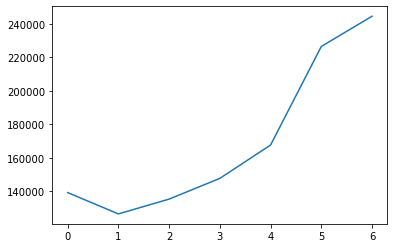

In [18]:
#YearBuilt, YearRemodAdd bands
bins = pd.IntervalIndex.from_tuples([(1871, 1911), (1911, 1931), (1931, 1950), (1950,1970), (1970, 1990), (1990,2000), (2000,2010)])
train['YearBuilt']=pd.cut(train['YearBuilt'], bins=bins)
test['YearBuilt']=pd.cut(test['YearBuilt'], bins=bins)

plt.plot(train[['YearBuilt', 'SalePrice']].groupby(['YearBuilt'], as_index=True).mean())


from sklearn import preprocessing
le_yb = preprocessing.LabelEncoder()
train['YearBuilt'] = le_yb.fit_transform(train['YearBuilt'])
test['YearBuilt'] = le_yb.transform(test['YearBuilt'])


In [19]:
#RoofStyle
train.loc[(train['RoofStyle'] == 'Shed') | (train['RoofStyle'] == 'Mansard') | (train['RoofStyle'] == 'Gambrel') | (train['RoofStyle'] == 'Flat'), 'RoofStyle'] = 'Other'
test.loc[(test['RoofStyle'] == 'Shed') | (test['RoofStyle'] == 'Mansard') | (test['RoofStyle'] == 'Gambrel') | (test['RoofStyle'] == 'Flat'), 'RoofStyle'] = 'Other'

#encode
train = pd.concat([train, pd.get_dummies(train['RoofStyle'], drop_first=True, prefix='RoofStyle')], axis = 1)
train=train.drop(columns=['RoofStyle'])
test = pd.concat([test, pd.get_dummies(test['RoofStyle'], drop_first=True, prefix='RoofStyle')], axis = 1)
test=test.drop(columns=['RoofStyle'])

In [20]:
#RoofMatl, drop
train.loc[(train['RoofMatl'] != 'CompShg'), 'RoofMatl'] = 0
train.loc[(train['RoofMatl'] == 'CompShg'), 'RoofMatl'] = 1

test.loc[(test['RoofMatl'] != 'CompShg'), 'RoofMatl'] = 0
test.loc[(test['RoofMatl'] == 'CompShg'), 'RoofMatl'] = 1


train['RoofMatl']=train['RoofMatl'].astype(int)
test['RoofMatl']=test['RoofMatl'].astype(int)

In [21]:
#Exterior1st Exterior2nd missing in test

train['Exterior1st'].value_counts()

test['Exterior1st'] = test.fillna(test['Exterior1st'].value_counts().index[0])
test['Exterior2nd']= test.fillna(test['Exterior2nd'].value_counts().index[0])
train.loc[(train['Exterior1st'] == 'VinylSd') | (train['Exterior2nd'] == 'VinylSd') , 'Ext_VinylSd'] = 1
train.loc[(train['Exterior1st'] == 'HdBoard') | (train['Exterior2nd'] == 'HdBoard') , 'Ext_HdBoard'] = 1
train.loc[(train['Exterior1st'] == 'MetalSd') | (train['Exterior2nd'] == 'MetalSd') , 'Ext_MetalSd'] = 1
train.loc[(train['Exterior1st'] == 'Wd Sdng') | (train['Exterior2nd'] == 'Wd Sdng') , 'Ext_Wd_Sdng'] = 1
train.loc[(train['Exterior1st'] == 'Wd Shng') | (train['Exterior2nd'] == 'Wd Shng') , 'Ext_Wd_Shng'] = 1
train.loc[(train['Exterior1st'] == 'Plywood') | (train['Exterior2nd'] == 'Plywood') , 'Ext_Plywood'] = 1
train.loc[(train['Exterior1st'] == 'CemntBd') | (train['Exterior2nd'] == 'CemntBd') , 'Ext_CemntBd'] = 1
train.loc[(train['Exterior1st'] == 'BrkFace') | (train['Exterior2nd'] == 'BrkFace') , 'Ext_BrkFace'] = 1
train.loc[(train['Exterior1st'] == 'WdShing') | (train['Exterior2nd'] == 'WdShing'), 'Ext_WdShing'] = 1
train.loc[(train['Exterior1st'] == 'Stucco') | (train['Exterior2nd'] == 'Stucco') , 'Ext_Stucco'] = 1
train.loc[(train['Exterior1st'] == 'AsbShng') | (train['Exterior2nd'] == 'AsbShng') , 'Ext_AsbShng'] = 1

test.loc[(test['Exterior1st'] == 'VinylSd') | (test['Exterior2nd'] == 'VinylSd') , 'Ext_VinylSd'] = 1
test.loc[(test['Exterior1st'] == 'HdBoard') | (test['Exterior2nd'] == 'HdBoard') , 'Ext_HdBoard'] = 1
test.loc[(test['Exterior1st'] == 'MetalSd') | (test['Exterior2nd'] == 'MetalSd') , 'Ext_MetalSd'] = 1
test.loc[(test['Exterior1st'] == 'Wd Sdng') | (test['Exterior2nd'] == 'Wd Sdng') , 'Ext_Wd_Sdng'] = 1
test.loc[(test['Exterior1st'] == 'Wd Shng') | (test['Exterior2nd'] == 'Wd Shng') , 'Ext_Wd_Shng'] = 1
test.loc[(test['Exterior1st'] == 'Plywood') | (test['Exterior2nd'] == 'Plywood') , 'Ext_Plywood'] = 1
test.loc[(test['Exterior1st'] == 'CemntBd') | (test['Exterior2nd'] == 'CemntBd') , 'Ext_CemntBd'] = 1
test.loc[(test['Exterior1st'] == 'BrkFace') | (test['Exterior2nd'] == 'BrkFace') , 'Ext_BrkFace'] = 1
test.loc[(test['Exterior1st'] == 'WdShing') | (test['Exterior2nd'] == 'WdShing'), 'Ext_WdShing'] = 1
test.loc[(test['Exterior1st'] == 'Stucco') | (test['Exterior2nd'] == 'Stucco') , 'Ext_Stucco'] = 1
test.loc[(test['Exterior1st'] == 'AsbShng') | (test['Exterior2nd'] == 'AsbShng') , 'Ext_AsbShng'] = 1


train[['Ext_VinylSd','Ext_HdBoard','Ext_MetalSd','Ext_Wd_Sdng','Ext_Wd_Shng','Ext_Plywood', 'Ext_CemntBd', 'Ext_BrkFace', 'Ext_WdShing', 'Ext_Stucco', 'Ext_AsbShng']]=train[['Ext_VinylSd','Ext_HdBoard','Ext_MetalSd','Ext_Wd_Sdng','Ext_Wd_Shng','Ext_Plywood', 'Ext_CemntBd', 'Ext_BrkFace', 'Ext_WdShing', 'Ext_Stucco', 'Ext_AsbShng']].fillna(0).astype(int)
test[['Ext_VinylSd','Ext_HdBoard','Ext_MetalSd','Ext_Wd_Sdng','Ext_Wd_Shng','Ext_Plywood', 'Ext_CemntBd', 'Ext_BrkFace', 'Ext_WdShing', 'Ext_Stucco', 'Ext_AsbShng']]=test[['Ext_VinylSd','Ext_HdBoard','Ext_MetalSd','Ext_Wd_Sdng','Ext_Wd_Shng','Ext_Plywood', 'Ext_CemntBd', 'Ext_BrkFace', 'Ext_WdShing', 'Ext_Stucco', 'Ext_AsbShng']].fillna(0).astype(int)

train[['Ext_VinylSd','Ext_HdBoard','Ext_MetalSd','Ext_Wd_Sdng','Ext_Wd_Shng','Ext_Plywood', 'Ext_CemntBd', 'Ext_BrkFace', 'Ext_WdShing', 'Ext_Stucco', 'Ext_AsbShng']].isna().sum()


train=train.drop(columns=['Exterior1st','Exterior2nd'])
test=test.drop(columns=['Exterior1st','Exterior2nd'])

In [22]:
#MasVnrType drop BrkCmn
train['MasVnrType'].value_counts()

#missing values
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].value_counts().index[0])
test['MasVnrType'] = train['MasVnrType'].fillna(test['MasVnrType'].value_counts().index[0])

#encode
train = pd.concat([train, pd.get_dummies(train['MasVnrType'], drop_first=True, prefix='MasVnrType')], axis = 1)
train=train.drop(columns=['MasVnrType'])
test = pd.concat([test, pd.get_dummies(test['MasVnrType'], drop_first=True, prefix='MasVnrType')], axis = 1)
test=test.drop(columns=['MasVnrType'])

In [23]:
#MasVnrArea

#missing values
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].value_counts().index[0])
test['MasVnrArea'] = test['MasVnrArea'].fillna(train['MasVnrArea'].value_counts().index[0])

#scaled
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train['MasVnrArea'] = sc.fit_transform(train['MasVnrArea'].values.reshape(-1, 1))
test['MasVnrArea'] = sc.transform(test['MasVnrArea'].values.reshape(-1, 1))

In [24]:
#ExterQual

#encode
train['ExterQual']=train['ExterQual'].map({
    'TA': 1,
    'Gd': 2,
    'Ex': 3,
    'Fa': 0})

test['ExterQual']=test['ExterQual'].map({
    'TA': 1,
    'Gd': 2,
    'Ex': 3,
    'Fa': 0})

In [25]:
#ExterCond
#remove Po,Ex
#encode
train['ExterCond']=train['ExterCond'].map({
    'TA': 2,
    'Gd': 3,
    'Ex': 4,
    'Fa': 1,
    'Po': 0})
test['ExterCond']=test['ExterCond'].map({
    'TA': 2,
    'Gd': 3,
    'Ex': 4,
    'Fa': 1,
    'Po': 0})

In [26]:
#Foundation

train.loc[(train['Foundation'] == 'Stone') | (train['Foundation'] == 'Wood') , 'Foundation'] = train['Foundation'].value_counts().index[0]
test.loc[(test['Foundation'] == 'Stone') | (test['Foundation'] == 'Wood') , 'Foundation'] = train['Foundation'].value_counts().index[0]
train['Foundation'].value_counts()
#encode
train = pd.concat([train, pd.get_dummies(train['Foundation'], drop_first=True, prefix='Foundation')], axis = 1)
train=train.drop(columns=['Foundation'])
test = pd.concat([test, pd.get_dummies(test['Foundation'], drop_first=True, prefix='Foundation')], axis = 1)
test=test.drop(columns=['Foundation'])

In [27]:
#BsmtQual 

#missing values == no basement
train['BsmtQual'] = train['BsmtQual'].fillna('No')
test['BsmtQual'] = test['BsmtQual'].fillna('No')

#encode
train['BsmtQual']=train['BsmtQual'].map({
    'TA': 3,
    'Gd': 4,
    'Ex': 5,
    'Fa': 2,
    'Po': 1,
    'No': 0,})

test['BsmtQual']=test['BsmtQual'].map({
    'TA': 3,
    'Gd': 4,
    'Ex': 5,
    'Fa': 2,
    'Po': 1,
    'No': 0,})

train['BsmtQual'].value_counts()

3    648
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

In [28]:
#BsmtCond
#combine No and Po?

#missing values == no basement
train['BsmtCond'] = train['BsmtCond'].fillna('No')
test['BsmtCond'] = test['BsmtCond'].fillna('No')

#encode
train['BsmtCond']=train['BsmtCond'].map({
    'TA': 3,
    'Gd': 4,
    'Ex': 5,
    'Fa': 2,
    'Po': 1,
    'No': 0,})

test['BsmtCond']=test['BsmtCond'].map({
    'TA': 3,
    'Gd': 4,
    'Ex': 5,
    'Fa': 2,
    'Po': 1,
    'No': 0,})


In [29]:
#BsmtExposure
#missing values == no basement
train['BsmtExposure'] = train['BsmtExposure'].fillna('NoB')
test['BsmtExposure'] = test['BsmtExposure'].fillna('NoB')

train['BsmtExposure']=train['BsmtExposure'].map({
    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,
    'NoB': 0,})
test['BsmtExposure']=test['BsmtExposure'].map({
    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,
    'NoB': 0,})

In [30]:
#Bsmts, I combined category and feet of that category

#missing values == no basement
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('No')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('No')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('No')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('No')

test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(train['BsmtFinSF1'].mean())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(train['BsmtFinSF2'].mean())

train.loc[(train['BsmtFinType1'] == 'GLQ'), 'Bsmt_GLQ'] = train['BsmtFinSF1']
train.loc[(train['BsmtFinType1'] == 'ALQ'), 'Bsmt_ALQ'] = train['BsmtFinSF1']
train.loc[(train['BsmtFinType1'] == 'BLQ'), 'Bsmt_BLQ'] = train['BsmtFinSF1']
train.loc[(train['BsmtFinType1'] == 'Rec'), 'Bsmt_Rec'] = train['BsmtFinSF1']
train.loc[(train['BsmtFinType1'] == 'LwQ'), 'Bsmt_LwQ'] = train['BsmtFinSF1']

test.loc[(test['BsmtFinType1'] == 'GLQ'), 'Bsmt_GLQ'] = test['BsmtFinSF1']
test.loc[(test['BsmtFinType1'] == 'ALQ'), 'Bsmt_ALQ'] = test['BsmtFinSF1']
test.loc[(test['BsmtFinType1'] == 'BLQ'), 'Bsmt_BLQ'] = test['BsmtFinSF1']
test.loc[(test['BsmtFinType1'] == 'Rec'), 'Bsmt_Rec'] = test['BsmtFinSF1']
test.loc[(test['BsmtFinType1'] == 'LwQ'), 'Bsmt_LwQ'] = test['BsmtFinSF1']

train.loc[(train['BsmtFinType2'] == 'GLQ'), 'Bsmt_GLQ'] = train['BsmtFinSF2']
train.loc[(train['BsmtFinType2'] == 'ALQ'), 'Bsmt_ALQ'] = train['BsmtFinSF2']
train.loc[(train['BsmtFinType2'] == 'BLQ'), 'Bsmt_BLQ'] = train['BsmtFinSF2']
train.loc[(train['BsmtFinType2'] == 'Rec'), 'Bsmt_Rec'] = train['BsmtFinSF2']
train.loc[(train['BsmtFinType2'] == 'LwQ'), 'Bsmt_LwQ'] = train['BsmtFinSF2']

test.loc[(test['BsmtFinType2'] == 'GLQ'), 'Bsmt_GLQ'] = test['BsmtFinSF2']
test.loc[(test['BsmtFinType2'] == 'ALQ'), 'Bsmt_ALQ'] = test['BsmtFinSF2']
test.loc[(test['BsmtFinType2'] == 'BLQ'), 'Bsmt_BLQ'] = test['BsmtFinSF2']
test.loc[(test['BsmtFinType2'] == 'Rec'), 'Bsmt_Rec'] = test['BsmtFinSF2']
test.loc[(test['BsmtFinType2'] == 'LwQ'), 'Bsmt_LwQ'] = test['BsmtFinSF2']

train[['Bsmt_GLQ','Bsmt_ALQ','Bsmt_BLQ','Bsmt_Rec','Bsmt_LwQ']]=train[['Bsmt_GLQ','Bsmt_ALQ','Bsmt_BLQ','Bsmt_Rec','Bsmt_LwQ']].fillna(0).astype(int)
test[['Bsmt_GLQ','Bsmt_ALQ','Bsmt_BLQ','Bsmt_Rec','Bsmt_LwQ']]=test[['Bsmt_GLQ','Bsmt_ALQ','Bsmt_BLQ','Bsmt_Rec','Bsmt_LwQ']].fillna(0).astype(int)

train=train.drop(columns=['BsmtFinType1','BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2'])
test=test.drop(columns=['BsmtFinType1','BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2'])

test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(0).astype(int)
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(0).astype(int)

In [31]:
#Heating

train.loc[(train['Heating'] != 'GasA') , 'Heating'] = 0
test.loc[(test['Heating'] != 'GasA') , 'Heating'] = 0
train.loc[(train['Heating'] == 'GasA') , 'Heating'] = 1
test.loc[(test['Heating'] == 'GasA') , 'Heating'] = 1

train['Heating']=train['Heating'].astype(int)
test['Heating']=test['Heating'].astype(int)

In [32]:
#HeatingQC

train['HeatingQC']=train['HeatingQC'].map({
    'Ex': 4,
    'Gd': 3,
    'TA': 2,
    'Fa': 1,
    'Po': 0,})

test['HeatingQC']=test['HeatingQC'].map({
    'Ex': 4,
    'Gd': 3,
    'TA': 2,
    'Fa': 1,
    'Po': 0,})

In [33]:
#CentralAir
#label encode 1/0
train['CentralAir'].replace(to_replace='Y', value=1, inplace=True) 
train['CentralAir'].replace(to_replace='N', value=0, inplace=True) 
test['CentralAir'].replace(to_replace='Y', value=1, inplace=True) 
test['CentralAir'].replace(to_replace='N', value=0, inplace=True)

In [34]:
#Electrical 1 null in train

# FuseF FuseP Mix
train.loc[(train['Electrical'] == 'FuseF') | (train['Electrical'] == 'FuseP') | (train['Electrical'] == 'Mix'), 'Electrical'] = 0
train['Electrical'].replace(to_replace='FuseA', value=1, inplace=True) 
train['Electrical'].replace(to_replace='SBrkr', value=2, inplace=True) 
train['Electrical']=train['Electrical'].fillna(0).astype(int)

test.loc[(test['Electrical'] == 'FuseF') | (test['Electrical'] == 'FuseP') | (test['Electrical'] == 'Mix'), 'Electrical'] = 0
test['Electrical'].replace(to_replace='FuseA', value=1, inplace=True) 
test['Electrical'].replace(to_replace='SBrkr', value=2, inplace=True) 
test['Electrical']=test['Electrical'].fillna(0).astype(int)

In [35]:
#LowQualFinSF
train.loc[(train['LowQualFinSF'] != 0, 'LowQualFinSF')] = 1
test.loc[(test['LowQualFinSF'] != 0, 'LowQualFinSF')] = 1

In [36]:
#BsmtFullBath
#null in test.
test['BsmtFullBath']=test['BsmtFullBath'].fillna(0).astype(int)

train['BsmtFullBath'].replace(to_replace=3, value=0, inplace=True)
test['BsmtFullBath'].replace(to_replace=3, value=0, inplace=True)

In [37]:
#BsmtHalfBath 
#null in test.
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(0).astype(int)

train['BsmtHalfBath'].replace(to_replace=2, value=0, inplace=True)
test['BsmtHalfBath'].replace(to_replace=2, value=0, inplace=True)

In [38]:
#FullBath combined 0 and 1
train['FullBath'].replace(to_replace=0, value=1, inplace=True)
test['FullBath'].replace(to_replace=0, value=1, inplace=True)

In [39]:
#HalfBath combined 2 and 1
train['HalfBath'].replace(to_replace=2, value=1, inplace=True)
test['HalfBath'].replace(to_replace=2, value=1, inplace=True)

In [40]:
#Bedroom removed 6 0 5 8. why is 1 higher than 2?
train['BedroomAbvGr'].replace(to_replace=6, value=3, inplace=True)
train['BedroomAbvGr'].replace(to_replace=8, value=3, inplace=True)
train['BedroomAbvGr'].replace(to_replace=5, value=3, inplace=True)
train['BedroomAbvGr'].replace(to_replace=0, value=3, inplace=True)

test['BedroomAbvGr'].replace(to_replace=6, value=3, inplace=True)
test['BedroomAbvGr'].replace(to_replace=8, value=3, inplace=True)
test['BedroomAbvGr'].replace(to_replace=5, value=3, inplace=True)
test['BedroomAbvGr'].replace(to_replace=0, value=3, inplace=True)

In [41]:
#KitchenAbvGr combined 0,1 and 2,3
train['KitchenAbvGr'].replace(to_replace=0, value=1, inplace=True)
train['KitchenAbvGr'].replace(to_replace=3, value=2, inplace=True)
test['KitchenAbvGr'].replace(to_replace=0, value=1, inplace=True)
test['KitchenAbvGr'].replace(to_replace=3, value=2, inplace=True)

In [42]:
#KitchenQual null in test
test['KitchenQual']=test['KitchenQual'].fillna(train['KitchenQual'].value_counts().index[0])
train['KitchenQual']=train['KitchenQual'].map({
    'Ex': 4,
    'Gd': 3,
    'TA': 2,
    'Fa': 1,
    'Po': 0,})
test['KitchenQual']=test['KitchenQual'].map({
    'Ex': 4,
    'Gd': 3,
    'TA': 2,
    'Fa': 1,
    'Po': 0,})

In [43]:
#TotRmsAbvGrd. combine 11+ and 3-

train.loc[(train['TotRmsAbvGrd'] >11), 'TotRmsAbvGrd'] = 11
train.loc[(train['TotRmsAbvGrd'] <3), 'TotRmsAbvGrd'] = 3
test.loc[(test['TotRmsAbvGrd'] >11), 'TotRmsAbvGrd'] = 11
test.loc[(test['TotRmsAbvGrd'] <3), 'TotRmsAbvGrd'] = 3

In [44]:
#Functional combine all except Typ?
#null in test
test['Functional']=test['Functional'].fillna('Typ')

train['Functional']=train['Functional'].map({
    'Typ': 4,
    'Min1': 3,
    'Min2': 2,
    'Mod': 1,
    'Maj1': 0,
    'Maj2': 0,
    'Sev': 0,
})
test['Functional']=test['Functional'].map({
    'Typ': 4,
    'Min1': 3,
    'Min2': 2,
    'Mod': 1,
    'Maj1': 0,
    'Maj2': 0,
    'Sev': 0,
})

In [45]:
#FireplaceQu
train['FireplaceQu']=train['FireplaceQu'].fillna('No')
test['FireplaceQu']=test['FireplaceQu'].fillna('No')
train['FireplaceQu']=train['FireplaceQu'].map({
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 0,
    'No': 1,
})
test['FireplaceQu']=test['FireplaceQu'].map({
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 0,
    'No': 1,
})

In [46]:
#GarageType 

train['GarageType']=train['GarageType'].fillna('No')
test['GarageType']=test['GarageType'].fillna('No')

train.loc[(train['GarageType'] == 'CarPort') | (train['GarageType'] == '2Types') , 'GarageType'] = 'Other'
test.loc[(test['GarageType'] == 'CarPort') | (test['GarageType'] == '2Types') , 'GarageType'] = 'Other'

#encode
train = pd.concat([train, pd.get_dummies(train['GarageType'], prefix='GarageType')], axis = 1)
train=train.drop(columns=['GarageType', 'GarageType_Other'])
test = pd.concat([test, pd.get_dummies(test['GarageType'],prefix='GarageType')], axis = 1)
test=test.drop(columns=['GarageType', 'GarageType_Other'])

In [47]:
#GarageYrBlt
#null values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
train['GarageYrBlt'] = imputer.fit_transform(train['GarageYrBlt'].values.reshape(-1, 1))
test['GarageYrBlt'] = imputer.transform(test['GarageYrBlt'].values.reshape(-1, 1))

bins = pd.IntervalIndex.from_tuples([(1700, 1960), (1960, 1985), (1985,2000), (2000, 2005), (2005,3000)])
train['GarageYrBlt']=pd.cut(train['GarageYrBlt'], bins=bins)
test['GarageYrBlt']=pd.cut(test['GarageYrBlt'], bins=bins)
train['GarageYrBlt'] = train['GarageYrBlt'].cat.codes
test['GarageYrBlt'] = test['GarageYrBlt'].cat.codes


In [48]:
#GarageFinish
train['GarageFinish']=train['GarageFinish'].fillna('No')
test['GarageFinish']=test['GarageFinish'].fillna('No')

train['GarageFinish']=train['GarageFinish'].map({
    'Fin': 3,
    'RFn': 2,
    'Unf': 1,
    'No': 0,
})
test['GarageFinish']=test['GarageFinish'].map({
    'Fin': 3,
    'RFn': 2,
    'Unf': 1,
    'No': 0,
})

In [49]:
#GarageCars grouped 3,3+
#missing
test['GarageCars']=test['GarageCars'].fillna(train['GarageCars'].value_counts().index[0])

train.loc[(train['GarageCars'] >3 , 'GarageCars')] = 3
test.loc[(test['GarageCars'] >3 , 'GarageCars')] = 3

In [50]:
#GarageArea
#missing
train['GarageArea']=train['GarageArea'].fillna(train['GarageCars'].mean())
test['GarageArea']=test['GarageArea'].fillna(train['GarageCars'].mean())

In [51]:
#GarageQual
#missing=no garage
train['GarageQual']=train['GarageQual'].fillna('No')
test['GarageQual']=test['GarageQual'].fillna('No')
train['GarageQual']=train['GarageQual'].map({
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 0,
    'No': 1,
})
test['GarageQual']=test['GarageQual'].map({
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 0,
    'No': 1,
})

In [52]:
#GarageCond
#missing=no garage
train['GarageCond']=train['GarageCond'].fillna('No')
test['GarageCond']=test['GarageCond'].fillna('No')
train['GarageCond']=train['GarageCond'].map({
    'Ex': 2,
    'Gd': 2,
    'TA': 2,
    'Fa': 1,
    'Po': 1,
    'No': 0,
})
test['GarageCond']=test['GarageCond'].map({
    'Ex': 2,
    'Gd': 2,
    'TA': 2,
    'Fa': 1,
    'Po': 1,
    'No': 0,
})

In [53]:
#PavedDrive
train['PavedDrive']=train['PavedDrive'].map({
    'Y': 2,
    'P': 1,
    'N': 0,
})
test['PavedDrive']=test['PavedDrive'].map({
    'Y': 2,
    'P': 1,
    'N': 0,
})

In [54]:
#WoodDeckSF bands
bins = pd.IntervalIndex.from_tuples([(-1, 0), (0, 100), (100, 150), (150,900)])
train['WoodDeckSF']=pd.cut(train['WoodDeckSF'], bins=bins)
test['WoodDeckSF']=pd.cut(test['WoodDeckSF'], bins=bins)
train['WoodDeckSF'] = train['WoodDeckSF'].cat.codes
test['WoodDeckSF'] = test['WoodDeckSF'].cat.codes

In [55]:
#OpenPorchSF
bins = pd.IntervalIndex.from_tuples([(-1, 0), (0,50), (50,900)])
train['OpenPorchSF']=pd.cut(train['OpenPorchSF'], bins=bins)
test['OpenPorchSF']=pd.cut(test['OpenPorchSF'], bins=bins)
train['OpenPorchSF'] = train['OpenPorchSF'].cat.codes
test['OpenPorchSF'] = test['OpenPorchSF'].cat.codes

In [56]:
#EnclosedPorch
#null in test
test['EnclosedPorch']=test['EnclosedPorch'].fillna(train['EnclosedPorch'].mean())
bins = pd.IntervalIndex.from_tuples([(-1, 0), (0,150), (150,1000)])
train['EnclosedPorch']=pd.cut(train['EnclosedPorch'], bins=bins)
test['EnclosedPorch']=pd.cut(test['EnclosedPorch'], bins=bins)
train['EnclosedPorch'] = train['EnclosedPorch'].cat.codes
test['EnclosedPorch'] = test['EnclosedPorch'].cat.codes

In [57]:
#3SsnPorch
train.loc[(train['3SsnPorch'] != 0) , '3SsnPorch'] = 1
test.loc[(test['3SsnPorch'] != 0) , '3SsnPorch'] = 1

In [58]:
#ScreenPorch
train.loc[(train['ScreenPorch'] != 0) , 'ScreenPorch'] = 1
test.loc[(test['3SsnPorch'] != 0) , '3SsnPorch'] = 1

In [59]:
#PoolArea and PoolQC dropped
train=train.drop(columns=['PoolArea','PoolQC'])
test=test.drop(columns=['PoolArea','PoolQC'])

In [60]:
#Fence
train['Fence'].fillna(0, inplace=True)
test['Fence'].fillna(0, inplace=True)

train.loc[(train['Fence'] != 0) , 'Fence'] = 1
test.loc[(test['Fence'] != 0) , 'Fence'] = 1

train['Fence']=train['Fence'].astype(int)
test['Fence']=test['Fence'].astype(int)

In [61]:
#MiscFeature drop
train=train.drop(columns=['MiscFeature'])
test=test.drop(columns=['MiscFeature'])

In [62]:
#SaleType drop. overfit
train=train.drop(columns=['SaleType'])
test=test.drop(columns=['SaleType'])

In [63]:
#SaleCondition Alloca AdjLand
train.loc[(train['SaleCondition'] != 'Partial'), 'SaleCondition'] = 0
train.loc[(train['SaleCondition'] == 'Partial'), 'SaleCondition'] = 1

test.loc[(test['SaleCondition'] != 'Partial'), 'SaleCondition'] = 0
test.loc[(test['SaleCondition'] == 'Partial'), 'SaleCondition'] = 1

train['SaleCondition']=train['SaleCondition'].astype(int)
test['SaleCondition']=test['SaleCondition'].astype(int)

In [64]:
#scale
from sklearn.preprocessing import StandardScaler
sc_sp = StandardScaler()
train['SalePrice'] = sc_sp.fit_transform(train['SalePrice'].values.reshape(-1, 1))

In [65]:
y_train=train['SalePrice'].iloc[:].values
x_train=train.drop(columns=['SalePrice'])
x_test=test

In [66]:
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

parameters = {'learning_rate': [0.04],
                  'subsample'    : [0.5],
                  'n_estimators' : [500, 600, 700],
                  'min_samples_split' : [2,3],
                  'min_samples_leaf' : [1,2],
                  'max_depth'    : [6]
                 }
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = parameters, cv = 5, n_jobs = -1)
grid_search.fit(x_train, y_train)
best_grid = grid_search.best_estimator_
best_grid

best_grid.fit(x_train, y_train)
round(best_grid.score(x_train, y_train), 2)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_grid, x_train, y_train, scoring='r2', cv=5)
scores

print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
grid_search.best_params_
#{'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.5}

In [ ]:
results=best_grid.predict(x_test)
results=sc_sp.inverse_transform(results)

In [ ]:
result_data = pd.read_csv("sample_submission.csv")
result_data

In [ ]:
output = pd.DataFrame({'Id': result_data.Id, 'SalePrice': results})
output.to_csv('my_submission.csv', index=False)